# Predict housing prices

The goal of this activity is to predict the median price (in $1,000's) of homes given their characteristics.

The [Boston Housing Prices](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) dataset is frequently used to test regression algorithms.

![Boston suburb](images/boston_housing.jpg)

The dataset contains information gathered in the 1970s concerning housing in the Boston suburban area. Each house has the following features.

| Feature | Description |
| --- | --- |
| 0 | Per capita crime rate by town |
| 1 | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| 2 | Proportion of non-retail business acres per town. |
| 3 | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| 4 | Nitric oxides concentration (parts per 10 million) |
| 5 | Average number of rooms per dwelling |
| 6 | Proportion of owner-occupied units built prior to 1940 |
| 7 | Weighted distances to five Boston employment centres |
| 8 | Index of accessibility to radial highways |
| 9 | Full-value property-tax rate per $10,000 |
| 10 | Pupil-teacher ratio by town |
| 11 | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| 12 | Lower status of the population |



## Environment setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [18]:
# Import ML packages
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression

scikit-learn version: 0.22.2.post1


## Step 1: Loading the data

In [4]:
dataset = load_boston()

# Describe the dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Show a sample of raw training data
df_boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target to DataFrame
df_boston['MEDV'] = dataset.target
# Show 10 random samples
df_boston.sample(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
307,0.04932,33.0,2.18,0.0,0.4720,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76,45.4
139,0.54452,0.0,21.89,0.0,0.6240,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46,17.8
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
56,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
210,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7
458,7.75223,0.0,18.10,0.0,0.7130,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23,14.9
125,0.16902,0.0,25.65,0.0,0.5810,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81,21.4
284,0.00906,90.0,2.97,0.0,0.4000,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85,32.2
351,0.07950,60.0,1.69,0.0,0.4110,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1


## Step 2: Preparing the data

### Question

Store input data and labels into the `x` and `y` variables respectively.

In [6]:
# BEGIN SOLUTION CODE
x = dataset.data
y = dataset.target
# END SOLUTION CODE

In [7]:
print(f'x: {x.shape}. y: {y.shape}')

assert x.shape == (506, 13)
assert y.shape == (506,)

x: (506, 13). y: (506,)


### Question

Prepare data for training. Store the data subsets in variables named `x_train`/`y_train` and `x_test`/`y_test` with a 20% ratio.

In [8]:
# BEGIN SOLUTION CODE
# Split data between training and test sets with a 80/20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20)
# END SOLUTION CODE

In [9]:
print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

assert x_train.shape == (404, 13)
assert y_train.shape == (404,)
assert x_test.shape == (102, 13)
assert y_test.shape == (102,)

x_train: (404, 13). y_train: (404,)
x_test: (102, 13). y_test: (102,)


### Question

Scale features by standardization while preventing information leakage from the test set.

In [10]:
# Standardize data
scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
mean_train = x_train.mean()
std_train = x_train.std()
print(f'mean_train: {mean_train}. std_train: {std_train}')

assert np.abs(np.max(mean_train)) < 10**-6
assert np.abs(np.max(std_train - 1)) < 10**-6

mean_train: 1.8453547059725375e-15. std_train: 0.9999999999999997


## Step 3: Training a model

### Question

Create a `SGDRegressor` instance and store it into the `model` variable. Fit this model on the training data.

In [12]:
# BEGIN SOLUTION CODE
model = SGDRegressor()
model.fit(x_train, y_train)
# END SOLUTION CODE

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

## Step 4: Evaluating the model

### Question

Compute the training and test MSE into the `mse_train` and `mse_test` variables respectively.

In [13]:
# BEGIN SOLUTION CODE
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Train and test MSE
mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test = np.mean((y_test - y_test_pred) ** 2)
# END SOLUTION CODE

Training MSE: 23.31. Test MSE: 17.57


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

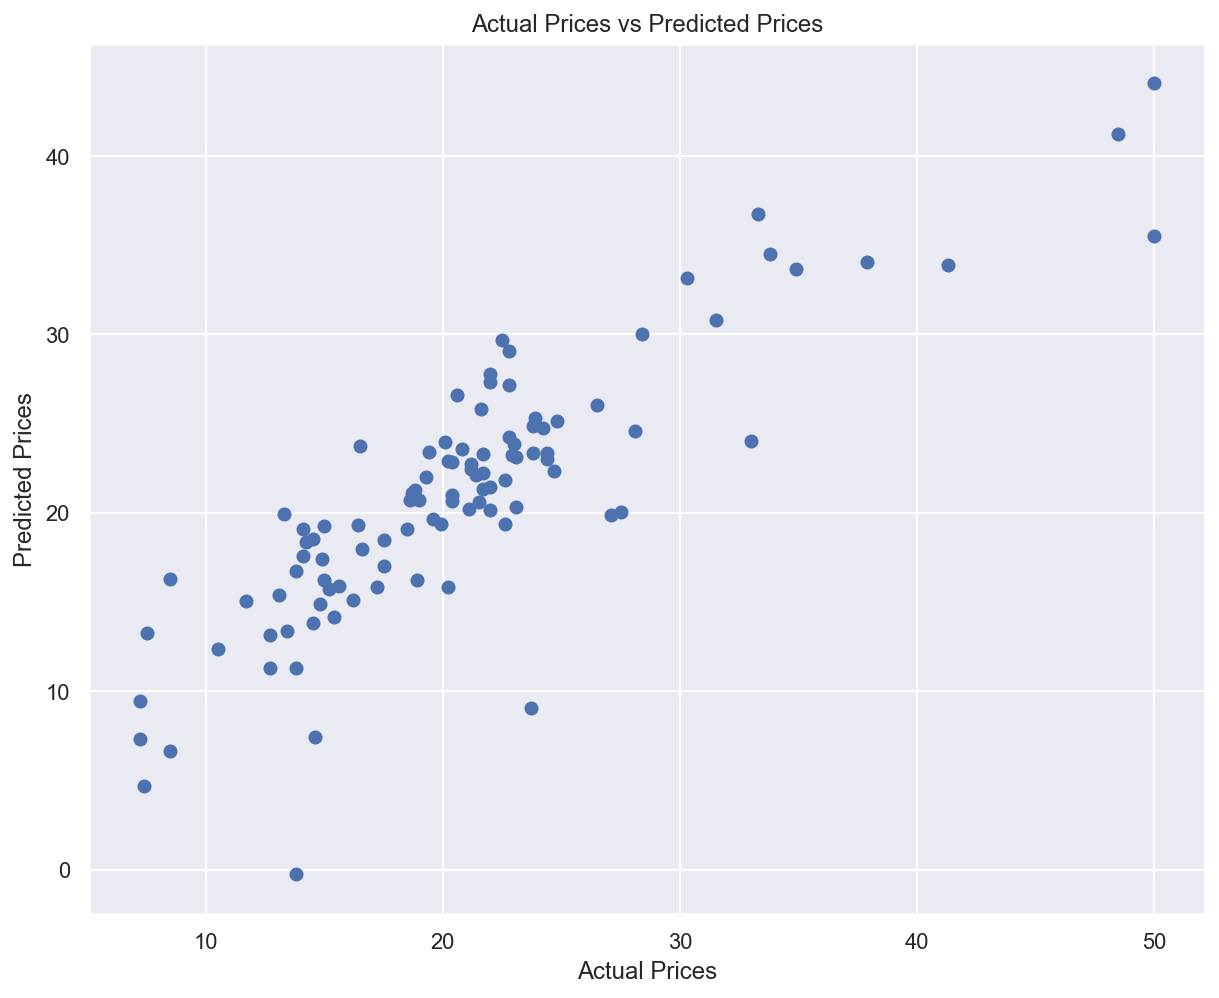

In [14]:
print (f'Training MSE: {mse_train:.2f}. Test MSE: {mse_test:.2f}')

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

### Question

Go back to step 3 and try to obtain the best possible test MSE by tweaking the `SGDRegressor` parameters.

## Step 5: Use another regression algorithm

### Question

- Create and fit a `LinearRegression` instance, which uses the normal equation instead of gradient descent.
- Compute the training and test MSE for this instance (variables `mse_train_n` and `mse_test_n`). How does it compare to the `SGDRegressor` in this case?

In [15]:
# BEGIN SOLUTION CODE
model_n = LinearRegression()
model_n.fit(x_train, y_train)
# END SOLUTION CODE

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# BEGIN SOLUTION CODE
y_train_pred_n = model_n.predict(x_train)
y_test_pred_n = model_n.predict(x_test)

# Train and test MSE
mse_train_n = np.mean((y_train - y_train_pred_n) ** 2)
mse_test_n = np.mean((y_test - y_test_pred_n) ** 2)
# END SOLUTION CODE

Training MSE: 23.24. Test MSE: 17.50


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

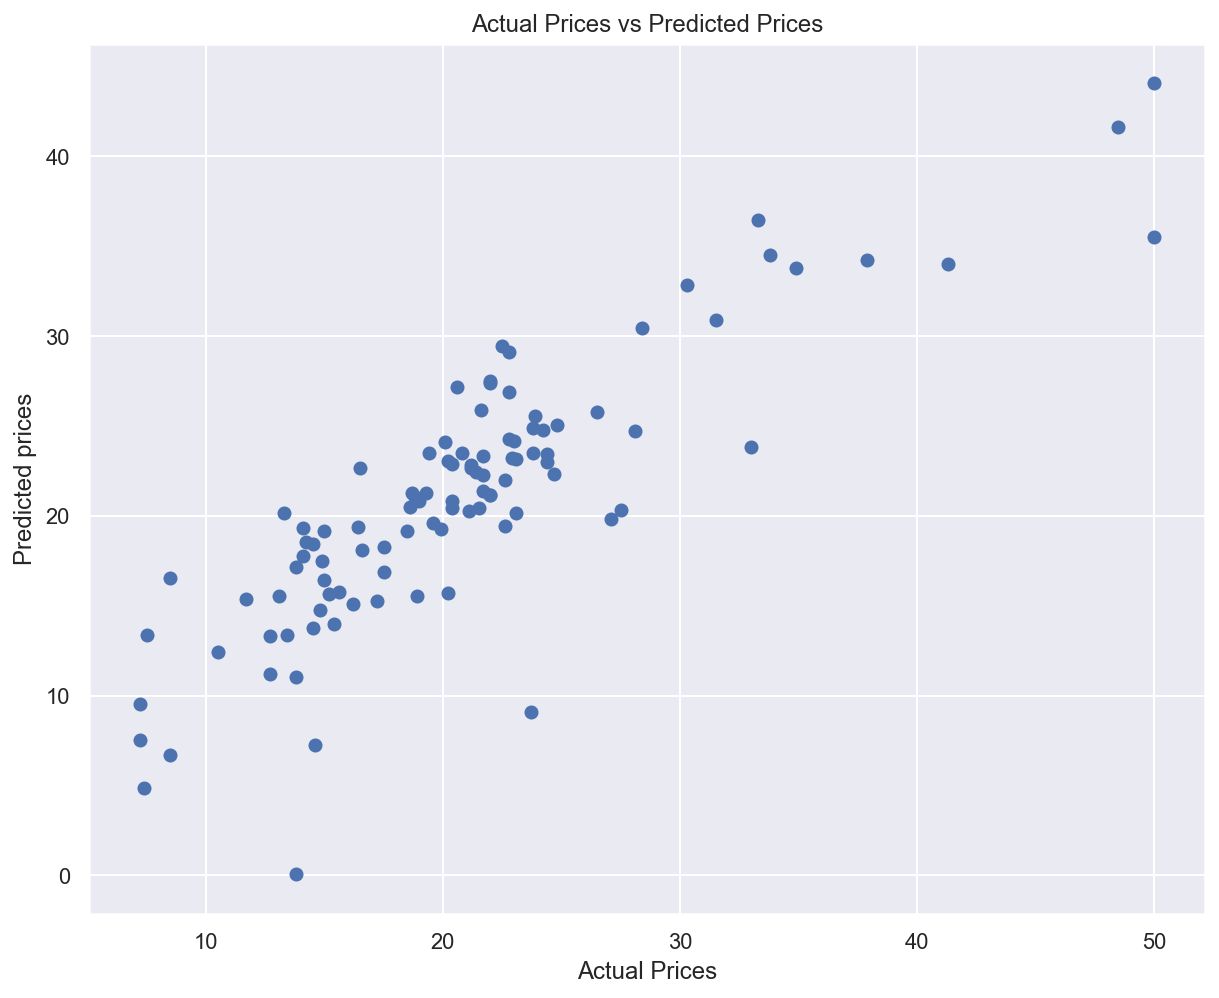

In [17]:
print (f'Training MSE: {mse_train_n:.2f}. Test MSE: {mse_test_n:.2f}')

plt.scatter(y_test, y_test_pred_n)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")